### Problem Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.


After the recent funding programmes, HELP have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

## Reading the data 

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

C:\Users\DELL INS 5558\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#reading the dataset
country_df = pd.read_csv("Country-data.csv")
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# basic checking of the data set
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
# checking the shape of the dataset.
country_df.shape

(167, 10)

In [5]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
# checking the duplicates in the dataset.
country_df['country'].nunique()

167

From the above code it is evident that there are no duplicates available in the dataset.

In [7]:
# checking the null values i the code
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
# checking the data types of the columns 
country_df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

All the data types of the variables are in is correct type. So the data types of the variables need not be changed

## EDA 

In [9]:
# we are duplicating the dataset in a different one for analysis
data = country_df.drop("country", axis =1)
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [10]:
# certain variables values are in percentage and hence it is converted into its value.
data['exports'] = data['exports'] * data['gdpp']/100
data['imports'] = data['imports'] * data['gdpp']/100
data['health'] = data['health'] * data['gdpp']/100

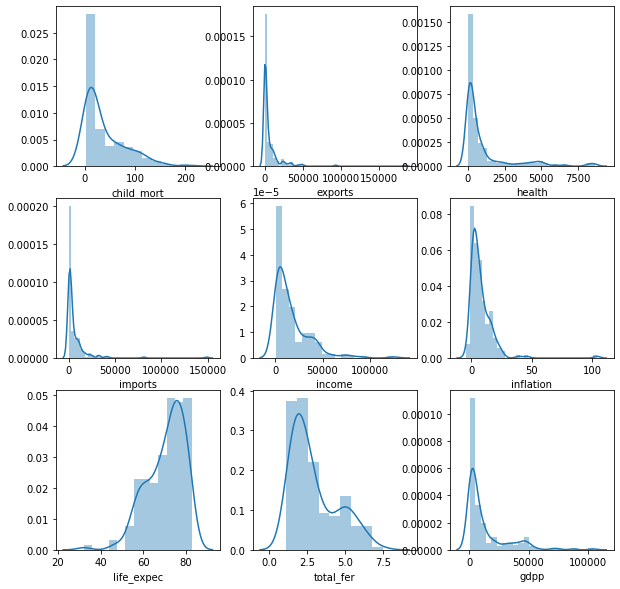

In [11]:
# Univariatre analysis of the variables
plt.figure(figsize = (10,10))
columns = data.columns
for i in enumerate(columns):
    plt.subplot(3,3, i[0]+1)
    sns.distplot(data[i[1]])

From the above analysis it is evident that all the variables follow the normal distribution. These are distributions with variations and its not a smooth analysis.

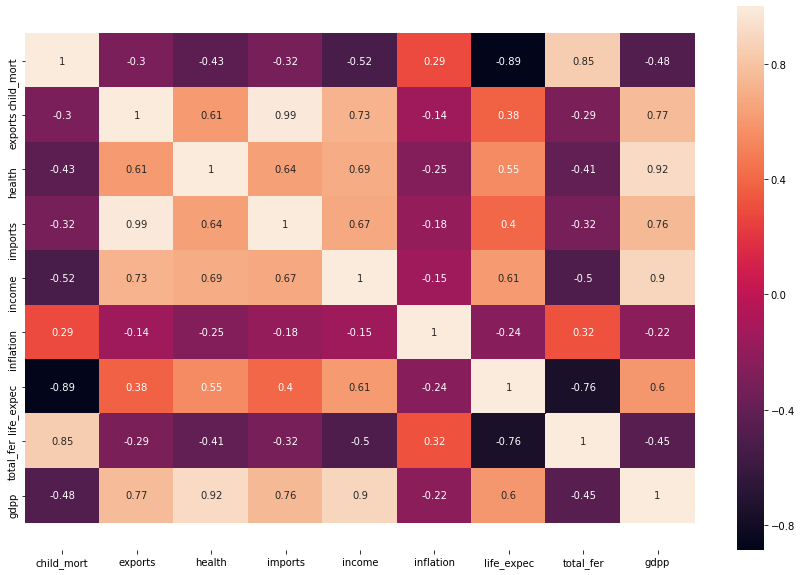

In [12]:
# checking for the correlation between the variables.
plt.figure(figsize = (15,10))        
axis = sns.heatmap(data.corr(),annot = True)
bottom, top = axis.get_ylim()
axis.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

From the above correlation matrix its shows that,
1. the gdpp variable is highly correlated to income and health.
2. the child_mort is highly correlated to total_fer  and inversely correlated to life_expec
3. the income variable is highly correlated to health and gdpp and is inversely correlated to inflation

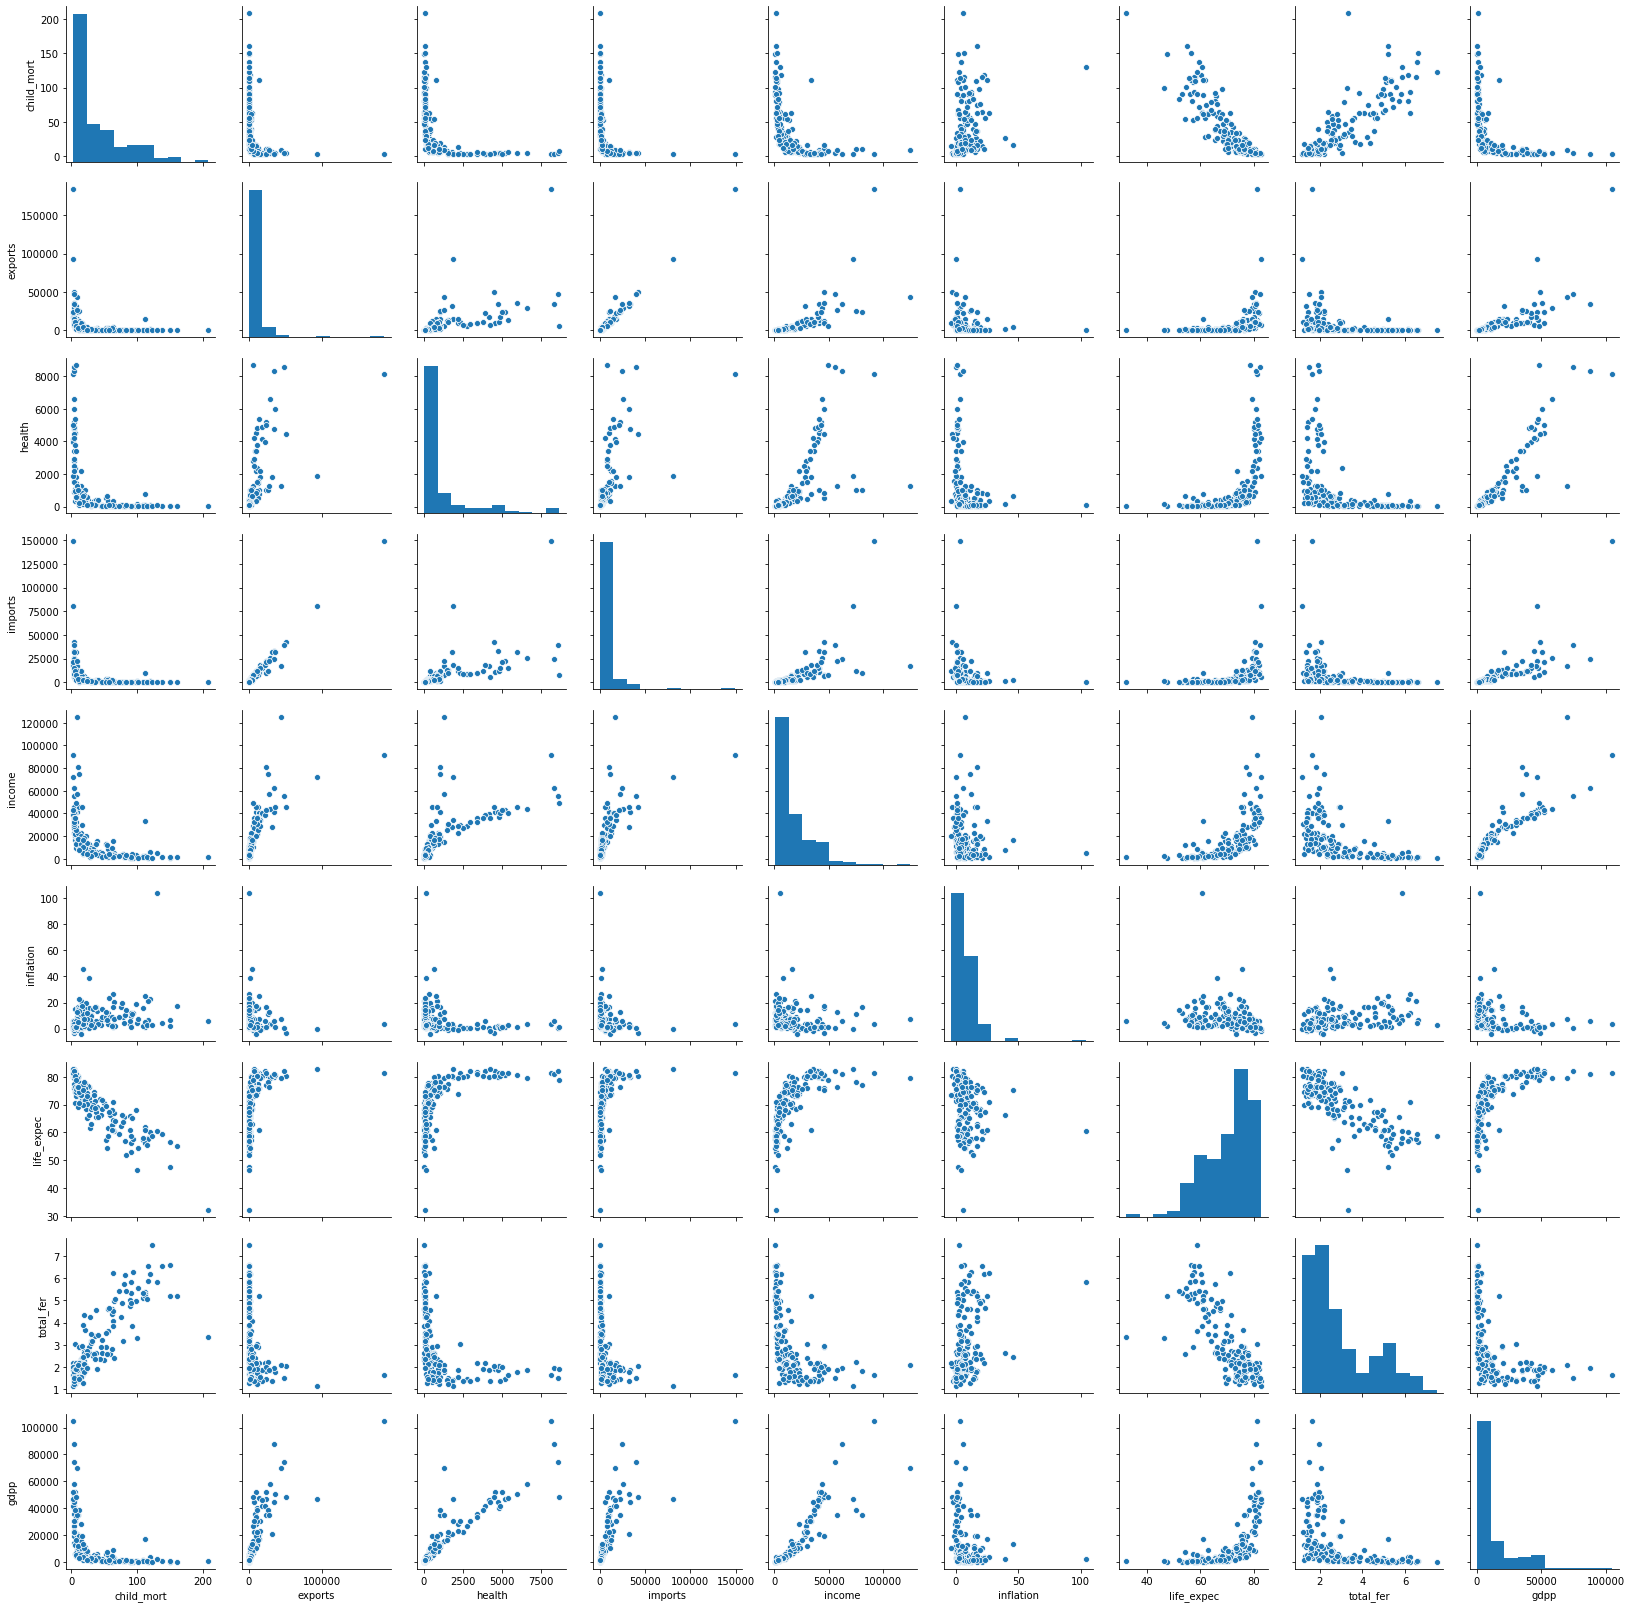

In [13]:
#numerical variables analysis using pair-plot
sns.pairplot(data)
plt.show()

The above plot explains that the variables form a certain pattern and are not uniformly scattered. Mostly all the variables are placed in a left-oriented pattern.

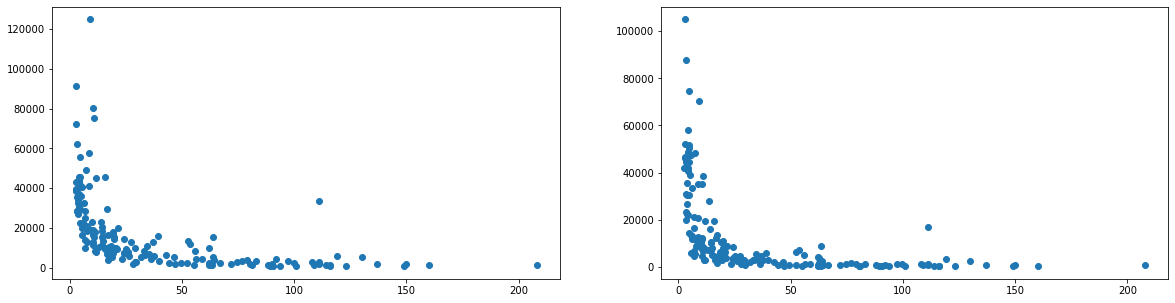

In [14]:
# Bi-variate analysis of the variables
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.scatter(data['child_mort'],data['income'])

plt.subplot(1,2,2)
plt.scatter(data['child_mort'],data['gdpp'])
plt.show()

The analysis shows that the points are related in a left-oriented pattern.

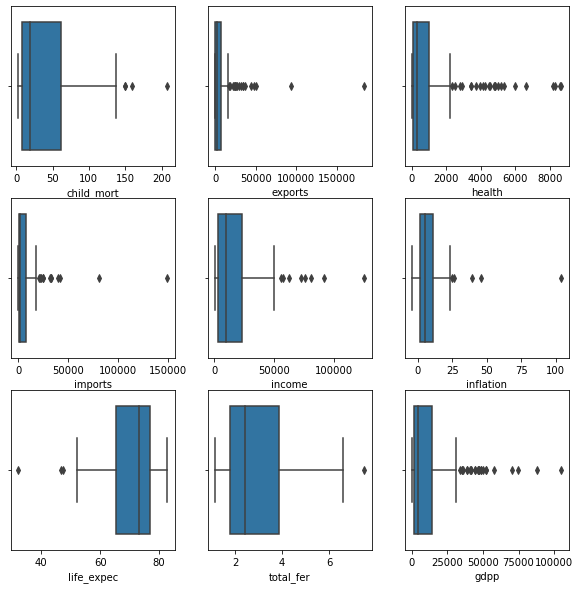

In [15]:
# Outlier analysis in the variables
plt.figure(figsize = (10,10))
columns = data.columns
for i in enumerate(columns):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(data[i[1]])

The above boxplot shows that there are few outliers present in the variables that needs to be treated either by removing/capping the values.

### Capping the outliers 

In [16]:
# capping the upper range of outliers in gdpp
q4 = data['gdpp'].quantile(0.99)
data['gdpp'][data['gdpp']>= q4] = q4

C:\Users\DELL INS 5558\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
# capping the upper range of outliers in income
q4 = data['income'].quantile(0.95)
data['income'][data['income']>= q4] = q4

C:\Users\DELL INS 5558\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
# capping the upper range of outliers in inflation
q4 = data['inflation'].quantile(0.95)
data['inflation'][data['inflation']>= q4] = q4

In [19]:
# capping the upper range of outliers in health
q4 = data['health'].quantile(0.95)
data['health'][data['health']>= q4] = q4

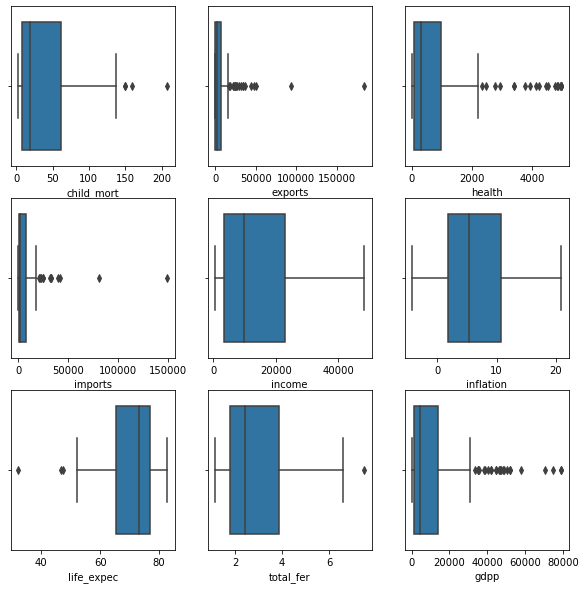

In [20]:
# checking for the outliers after the capping is done
plt.figure(figsize = (10,10))
columns = data.columns
for i in enumerate(columns):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(data[i[1]])

In [21]:
# Checking the hopkins

#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [22]:
# hopkins score
hopkins(data)

0.9773680969958698

In [23]:
# scaling the data before modelling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# fit_transform
data_scaled = scaler.fit_transform(data)
data_scaled.shape

(167, 9)

In [24]:
data_scaled

array([[4.26484907e-01, 2.95093321e-04, 5.87341663e-03, ...,
        4.75345168e-01, 7.36593060e-01, 4.08334073e-03],
       [6.81596884e-02, 6.22655666e-03, 5.14897031e-02, ...,
        8.71794872e-01, 7.88643533e-02, 4.89366829e-02],
       [1.20253165e-01, 9.31468360e-03, 3.49545825e-02, ...,
        8.75739645e-01, 2.74447950e-01, 5.36287203e-02],
       ...,
       [1.00778968e-01, 5.12723048e-03, 1.54995283e-02, ...,
        8.08678501e-01, 1.26182965e-01, 1.36829958e-02],
       [2.61441091e-01, 2.13292722e-03, 1.11098376e-02, ...,
        6.98224852e-01, 5.55205047e-01, 1.36829958e-02],
       [3.91918208e-01, 2.93402035e-03, 1.47708065e-02, ...,
        3.92504931e-01, 6.70347003e-01, 1.55851732e-02]])

In [25]:
# creating a new dataframe with the scaled values.
data_1 = pd.DataFrame(data_scaled, columns = data.columns)
data_1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.000295,0.005873,0.001661,0.020994,0.544258,0.475345,0.736593,0.004083
1,0.068160,0.006227,0.051490,0.013327,0.195487,0.346890,0.871795,0.078864,0.048937
2,0.120253,0.009315,0.034955,0.009388,0.257776,0.809809,0.875740,0.274448,0.053629
3,0.566699,0.011963,0.017720,0.010152,0.110967,1.000000,0.552268,0.790221,0.041835
4,0.037488,0.030204,0.145914,0.048190,0.387806,0.225279,0.881657,0.154574,0.151781


## K- Means Clustering

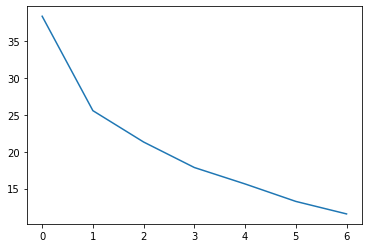

In [26]:
from sklearn.metrics import silhouette_score
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data_1)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [27]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data_1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(data_1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
  

For n_clusters=2, the silhouette score is 0.48207528073614514
For n_clusters=3, the silhouette score is 0.39323527053787205
For n_clusters=4, the silhouette score is 0.3203260852096048
For n_clusters=5, the silhouette score is 0.3398104065827687
For n_clusters=6, the silhouette score is 0.33601905337856025
For n_clusters=7, the silhouette score is 0.34496914172176824
For n_clusters=8, the silhouette score is 0.35100664525932157


In [28]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(data_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
# cluster labels for each row
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 1, 2, 0, 1, 1, 0, 0, 2, 0, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [30]:
# attaching the cluster_id column to the data frome 
data_1['cluster_id'] = kmeans.labels_
data_1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,0.426485,0.000295,0.005873,0.001661,0.020994,0.544258,0.475345,0.736593,0.004083,2
1,0.068160,0.006227,0.051490,0.013327,0.195487,0.346890,0.871795,0.078864,0.048937,0
2,0.120253,0.009315,0.034955,0.009388,0.257776,0.809809,0.875740,0.274448,0.053629,0
3,0.566699,0.011963,0.017720,0.010152,0.110967,1.000000,0.552268,0.790221,0.041835,2
4,0.037488,0.030204,0.145914,0.048190,0.387806,0.225279,0.881657,0.154574,0.151781,0


In [31]:
# adding the country column to the data frome
data_1["Country"] = country_df['country']

In [32]:
# checking the count in each clusters
data_1.cluster_id.value_counts()

0    84
2    47
1    36
Name: cluster_id, dtype: int64

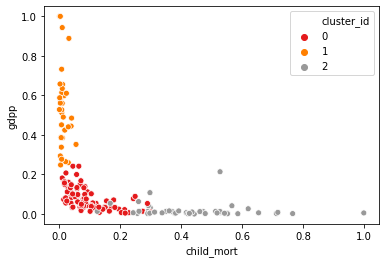

In [33]:
# Plot the cluster
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'cluster_id', data = data_1, palette = 'Set1')

From the above plot it is evident that the cluster_id 0 is the one that needs to be given AID based on the analysis of child_mort with the GDPP. The gdpp values of the other two clusters are pretty much high than cluster_id = 0 

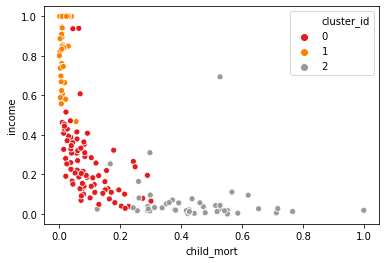

In [34]:
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'cluster_id', data = data_1, palette = 'Set1')

From the above plot it is evident that the cluster_id 0 is the one that needs to be given AID based on the analysis of child_mort with the income. The income values of the other two clusters are pretty much high than cluster_id = 0 

## Cluster Profiling

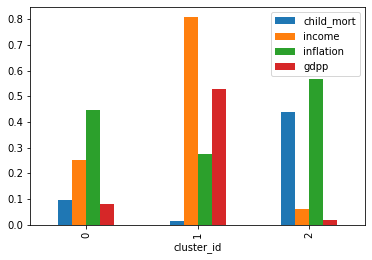

In [35]:
# cluster profiling by grouping using the cluster_id
data_1.drop(['exports', 'health', 'imports','life_expec','total_fer'], axis = 1).groupby('cluster_id').mean().plot(kind = 'bar')
plt.show()

The bar graph shows it very obviously that the child mortality and inflation is high for cluster= 0 and the income and the gdpp values are too low 

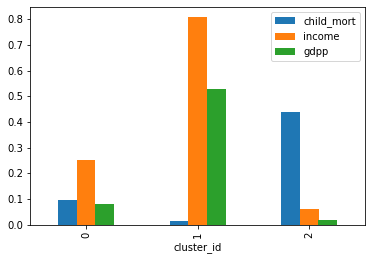

In [36]:
# cluster profiling the clusters with the child_mort, income and gdpp variables
data_1.drop(['exports', 'health', 'imports','life_expec','total_fer','inflation'], axis = 1).groupby('cluster_id').mean().plot(kind = 'bar')
plt.show()

The above bar graph analysis show that the cluster=0 has the highest child mortality rate with the least income and gdpp rates than the other two clusters. Hence its evident that the cluster=0 is the one that needs to be given AID.

In [37]:
# creating a separate datafrome only with the countries that needs to be given AID
AID_df = data_1[data_1['cluster_id'] == 0]
AID_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,Country
1,0.068160,0.006227,0.051490,0.013327,0.195487,0.346890,0.871795,0.078864,0.048937,0,Albania
2,0.120253,0.009315,0.034955,0.009388,0.257776,0.809809,0.875740,0.274448,0.053629,0,Algeria
4,0.037488,0.030204,0.145914,0.048190,0.387806,0.225279,0.881657,0.154574,0.151781,0,Antigua and Barbuda
5,0.057936,0.010588,0.165825,0.011049,0.379417,1.000000,0.861933,0.192429,0.127687,0,Argentina
6,0.075463,0.003639,0.026012,0.009779,0.127745,0.477671,0.812623,0.085174,0.037904,0,Armenia


In [38]:
# list of the countries that needs AID
print(list(AID_df['Country']))

['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Myanmar', 'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles', 'Slovak Republic', 'South Africa', 'Sri Lanka', 'St. Vincent and the Grenadines', 'Suriname', 'Thailand', 'Tonga', 'Tunisia', 'Turkey', 'Turkmenistan', 'Ukraine', 'Uru

In [39]:
# sorting the newly created datafrome on child_mort, income and gdpp variables
AID_df.sort_values(by = ['child_mort', 'income','gdpp'], ascending = [False, True, True]).head(8)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,Country
107,0.300876,0.000000,0.001341,0.000000,0.065246,0.448565,0.684418,0.198738,0.009600,0,Myanmar
154,0.289192,0.018431,0.019819,0.013247,0.195696,0.259968,0.706114,0.264984,0.053375,0,Turkmenistan
69,0.273612,0.001655,0.008449,0.002449,0.079717,0.525917,0.672584,0.228707,0.014190,0,India
137,0.248783,0.011325,0.128790,0.013374,0.238900,0.421053,0.437870,0.227129,0.089390,0,South Africa
21,0.242941,0.015061,0.103803,0.021844,0.266165,0.523525,0.493097,0.272871,0.077596,0,Botswana
12,0.227848,0.000654,0.002798,0.001104,0.038401,0.452552,0.755424,0.186120,0.006683,0,Bangladesh
109,0.216164,0.000303,0.003686,0.001441,0.028963,0.769936,0.714004,0.230284,0.004578,0,Nepal
19,0.214216,0.004434,0.016757,0.004551,0.100690,0.517943,0.779093,0.323344,0.022179,0,Bolivia


The top 5 countries which needs an urgent AID are:
1. Haiti
2. Sierra Leone
3. Chad
4. Central African Republic
5. Mali

These are the countries with highest child mortality rate and least income and gdpp values.

These are the countries that needs to be given AID:

Afghanistan, Angola, Benin, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo,Dem. Rep., Congo, Rep., Cote d'Ivoire, Equatorial Guinea, Eritrea, Gabon, Gambia, Ghana, Guinea, Guinea-Bissau,
Haiti, Iraq, Kenya, Kiribati, Lao, Lesotho, Liberia, Madagascar, Malawi, Mali, Mauritania, Mozambique, Namibia, Niger, Nigeria, Pakistan, Rwanda, Senegal, Sierra Leone, Solomon Islands, Sudan, Tajikistan, Tanzania, Timor-Leste, Togo, Uganda, Yemen, Zambia

## Hierarchial Cluestering 

In [40]:
# preparing a new datafrome for hierarchial cluestering
data_2 = data_1.drop(["cluster_id","Country"], axis =1)

In [41]:
data_2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.000295,0.005873,0.001661,0.020994,0.544258,0.475345,0.736593,0.004083
1,0.068160,0.006227,0.051490,0.013327,0.195487,0.346890,0.871795,0.078864,0.048937
2,0.120253,0.009315,0.034955,0.009388,0.257776,0.809809,0.875740,0.274448,0.053629
3,0.566699,0.011963,0.017720,0.010152,0.110967,1.000000,0.552268,0.790221,0.041835
4,0.037488,0.030204,0.145914,0.048190,0.387806,0.225279,0.881657,0.154574,0.151781


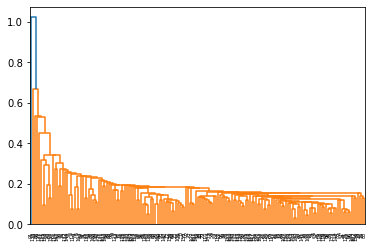

In [42]:
# single linkage
mergings = linkage(data_2, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

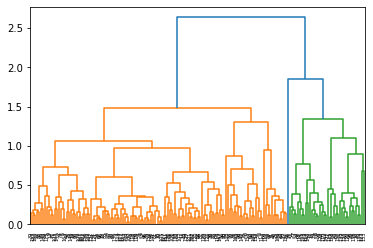

In [43]:
# complete linkage
mergings = linkage(data_2, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [44]:
# setting the number of cluesters as 4 and genertaing the cluster labels
cluster_labels = cut_tree(mergings, n_clusters= 4).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 0, 1, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 2, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [45]:
# attaching the cluster labels to the data frame
data_2['Cluster_id'] = cluster_labels
data_2

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_id
0,0.426485,0.000295,0.005873,0.001661,0.020994,0.544258,0.475345,0.736593,0.004083,0
1,0.068160,0.006227,0.051490,0.013327,0.195487,0.346890,0.871795,0.078864,0.048937,1
2,0.120253,0.009315,0.034955,0.009388,0.257776,0.809809,0.875740,0.274448,0.053629,1
3,0.566699,0.011963,0.017720,0.010152,0.110967,1.000000,0.552268,0.790221,0.041835,0
4,0.037488,0.030204,0.145914,0.048190,0.387806,0.225279,0.881657,0.154574,0.151781,1
...,...,...,...,...,...,...,...,...,...,...
162,0.129503,0.007526,0.028887,0.010493,0.049097,0.272329,0.609467,0.370662,0.034734,1
163,0.070594,0.020933,0.131216,0.015931,0.333277,1.000000,0.854043,0.208202,0.168267,1
164,0.100779,0.005127,0.015500,0.007042,0.081395,0.650319,0.808679,0.126183,0.013683,1
165,0.261441,0.002133,0.011110,0.003018,0.081185,1.000000,0.698225,0.555205,0.013683,0


In [46]:
# checking for the counts in each clusters
data_2["Cluster_id"].value_counts()

1    97
2    38
0    31
3     1
Name: Cluster_id, dtype: int64

In [47]:
# adding the country column in the data frame
data_2["Country"] = data_1['Country']

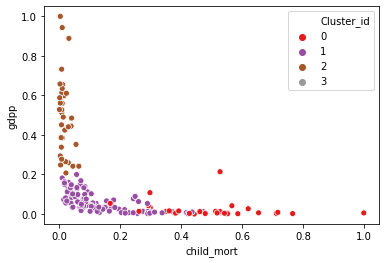

In [48]:
# visualizing the cluster created with respect to child_mort and gdpp
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'Cluster_id', data = data_2, palette = 'Set1')
plt.show()

From the above plot it is evident that the cluster_id 0 is the one that needs to be given AID based on the analysis of child_mort with the GDPP. The gdpp values of the other two clusters are pretty much high than cluster_id = 0 

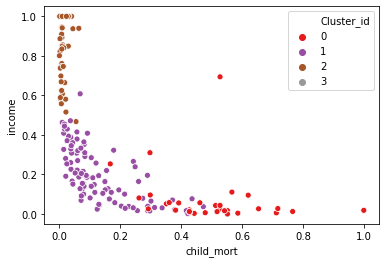

In [49]:
# visualizing the cluster created with respect to child_mort and income
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'Cluster_id', data = data_2, palette = 'Set1')
plt.show()

From the above plot it is evident that the cluster_id 0 is the one that needs to be given AID based on the analysis of child_mort with the income. The income values of the other two clusters are pretty much high than cluster_id = 0 

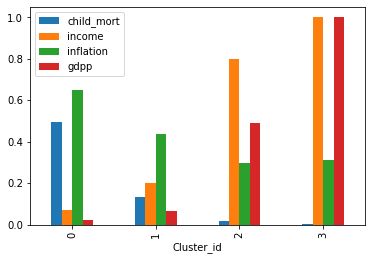

In [50]:
# cluster profiling by grouping using the cluster_id
data_2.drop(['exports', 'health', 'imports','life_expec','total_fer'], axis = 1).groupby('Cluster_id').mean().plot(kind = 'bar')

The bar graph shows it very obviously that the child mortality and inflation is high for cluster= 0 and the income and the gdpp values are too low 

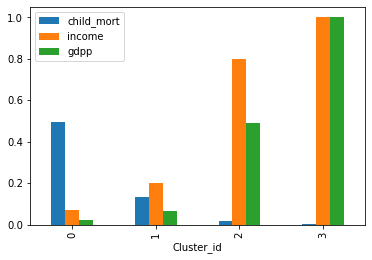

In [51]:
# cluster profiling the clusters with the child_mort, income and gdpp variables
data_2.drop(['exports', 'health', 'imports','life_expec','total_fer','inflation'], axis = 1).groupby('Cluster_id').mean().plot(kind = 'bar')

The above bar graph analysis show that the cluster=0 has the highest child mortality rate with the least income and gdpp rates than the other two clusters. Hence its evident that the cluster=0 is the one that needs to be given AID.

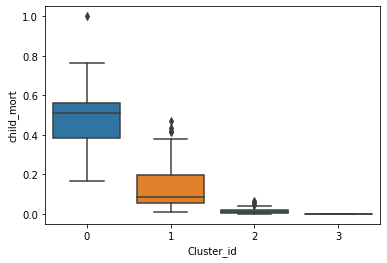

In [52]:
# visualization of child_mort with the cluster_id
sns.boxplot(x='Cluster_id', y='child_mort', data=data_2)
plt.show()

The above boxplot shows that cluster_id=0 has the highest child mortality rate

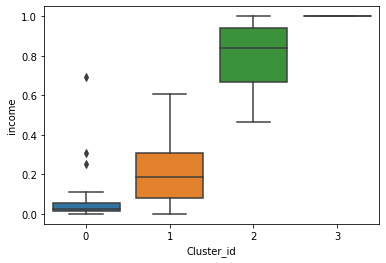

In [53]:
# visualization of income with the cluster_id
sns.boxplot(x='Cluster_id', y='income', data=data_2)
plt.show()

The above boxplot shows that cluster_id=0 has the least income rate

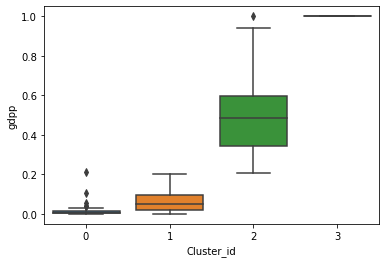

In [54]:
# visualization of gdpp with the cluster_id
sns.boxplot(x='Cluster_id', y='gdpp', data=data_2)
plt.show()

The above boxplot shows that cluster_id=0 has the least gdpp rate

In [55]:
# creating a new data frome with the cluster that needs AID
aid_df = data_2[data_2['Cluster_id'] == 0]
aid_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_id,Country
0,0.426485,0.000295,0.005873,0.001661,0.020994,0.544258,0.475345,0.736593,0.004083,0,Afghanistan
3,0.566699,0.011963,0.017720,0.010152,0.110967,1.000000,0.552268,0.790221,0.041835,0,Angola
17,0.527751,0.000976,0.003685,0.001887,0.025398,0.203150,0.585799,0.664038,0.006683,0,Benin
25,0.552093,0.000595,0.005235,0.001137,0.017219,0.439394,0.508876,0.744479,0.004362,0,Burkina Faso
26,0.443038,0.000106,0.002821,0.000603,0.003251,0.658293,0.504931,0.805994,0.000000,0,Burundi


In [56]:
# sorting the created dataframe with the child_mort,income and gdpp rates
aid_df.sort_values(by = ['child_mort', 'income','gdpp'], ascending = [False, True, True]).head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_id,Country
66,1.000000,0.000545,0.006646,0.002868,0.018687,0.385167,0.000000,0.343849,0.005466,0,Haiti
132,0.766310,0.000359,0.007963,0.000919,0.012814,0.853668,0.451677,0.638801,0.002130,0,Sierra Leone
32,0.717624,0.001791,0.005614,0.002613,0.027705,0.422648,0.481262,0.858044,0.008446,0,Chad
31,0.712756,0.000281,0.000995,0.000788,0.005851,0.248006,0.303748,0.640379,0.002726,0,Central African Republic
97,0.654333,0.000873,0.004529,0.001662,0.026447,0.342105,0.540434,0.851735,0.006049,0,Mali


In [57]:
# list of the countries that needs AID
print(list(aid_df['Country']))

['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Gabon', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Niger', 'Nigeria', 'Sierra Leone', 'Sudan', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia']


The top 5 countries which needs an urgent AID are:
1. Haiti
2. Sierra Leone
3. Chad
4. Central African Republic
5. Mali

These are the countries with highest child mortality rate and least income and gdpp values.

These are the countries that needs to be given AID:

Afghanistan, Angola, Benin, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire, Equatorial Guinea, Gabon, Ghana, Guinea, Guinea-Bissau, Haiti, Iraq, Malawi, Mali, Mauritania, Mozambique, Niger, Nigeria, Sierra Leone, Sudan, Timor-Leste, Togo, Uganda, Yemen, Zambia


From the above visualizations it is evident that the cluster_id = 0 contains the highest child mortality rate with the least income and gdpp rates

#### Result:

The clustering that followed Hierarchical cluestering algorithm provides a good number of cluesters based on the business aspect. Since the final number of countries that needs AID is less in hierarchial clustering when analysed both on technical and business aspect.